This will be my first solo machine learning project. I will be using the FIFA19 dataset from kaggle.com. 

My main goal for this project is to fully contruct and optimize a simple supervised machine learning algorithm. I will set this up as a classification problem to try and relate player stats to the position they play in. 

In [48]:
#imports

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


I realised after completing this that i should have just dropped all of the irrelevant data right from the beginning. Here i am dropping the NA values from the features. I did not include goalkeeping statistics as this is irrelevant to the striker position.

In [26]:
#Begin by importing the data

df = pd.read_csv('fifa19.csv')

#need to drop na

df= df.dropna(how='any',axis=0,subset=['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 
      'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping',
      'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
      'Marking', 'StandingTackle', 'SlidingTackle','Position'])

df=df.dropna(how='any',axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 58 columns):
Unnamed: 0                  18147 non-null int64
ID                          18147 non-null int64
Name                        18147 non-null object
Age                         18147 non-null int64
Photo                       18147 non-null object
Nationality                 18147 non-null object
Flag                        18147 non-null object
Overall                     18147 non-null int64
Potential                   18147 non-null int64
Club Logo                   18147 non-null object
Value                       18147 non-null object
Wage                        18147 non-null object
Special                     18147 non-null int64
Preferred Foot              18147 non-null object
International Reputation    18147 non-null float64
Weak Foot                   18147 non-null float64
Skill Moves                 18147 non-null float64
Work Rate                   18147 non-null o

In [27]:
#set the random state
random_seed = np.random.RandomState(2)

I want to use a KneighborsClassifier to determine if a player is a striker. I've defined it as someone who plays in the ['RF,ST,LF,LW,RW'] position. 


In [29]:


# My features will be player stats from crossing to sliding tackle as these are the main attributes for outfield players

X= df[['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 
      'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping',
      'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
      'Marking', 'StandingTackle', 'SlidingTackle']]

forwards=df['Position'].isin(['RW','LW','ST','LF','RF'])

y=forwards



#splitting the data in to train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=random_seed)

In [30]:
#check if there is any null data
X

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
9,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,...,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0


The data is already on a scale of 0-100 so i will not be using a Scaler to adjust it in this case. Next i will begin to set up my classifier with an arbitrary number of neighbors. I will then fine tune and test this later on to find an optimal number of neighbors.

In [36]:
#setting up my classifier

knn = KNeighborsClassifier(n_neighbors=10)



In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
pred=knn.predict(X_test)

In [45]:
print(confusion_matrix(y_test,pred,))

[[4383  188]
 [ 306  568]]


Next i will create a range of values to test what the best value of neighbors will be. I will then plot the data to give me a visual representation of the best solution to my problem. 

In [46]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

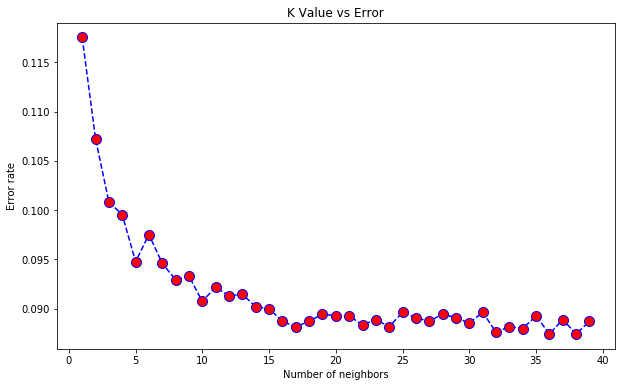

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',
        markersize=10)
plt.title('K Value vs Error')
plt.xlabel('Number of neighbors')
plt.ylabel('Error rate')
plt.show()

Here i can show the different in accuracy between K=1 and K=32

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[4232  339]
 [ 301  573]]


              precision    recall  f1-score   support

       False       0.93      0.93      0.93      4571
        True       0.63      0.66      0.64       874

   micro avg       0.88      0.88      0.88      5445
   macro avg       0.78      0.79      0.79      5445
weighted avg       0.88      0.88      0.88      5445



In [52]:
knn=KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('Now with K=32')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Now with K=32


[[4387  184]
 [ 293  581]]


              precision    recall  f1-score   support

       False       0.94      0.96      0.95      4571
        True       0.76      0.66      0.71       874

   micro avg       0.91      0.91      0.91      5445
   macro avg       0.85      0.81      0.83      5445
weighted avg       0.91      0.91      0.91      5445

